# Missing data analysis

In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [197]:
DATASET_PATH = '../data/final_sampled_data.parquet'

In [198]:
raw_df =  pd.read_parquet(DATASET_PATH)

In [199]:
raw_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,month,year
count,2.422305e+06,2422305,2422305,2.407362e+06,2.422305e+06,2.407362e+06,2.422305e+06,2.422305e+06,2.422305e+06,2.422305e+06,2.422305e+06,2.422305e+06,2.422305e+06,2.422305e+06,2.422305e+06,2.422305e+06,2.407362e+06,0.0,2.422305e+06,2.422305e+06
mean,1.651732e+00,2019-07-17 19:07:38.146709248,2019-07-17 19:24:16.874597888,1.542574e+00,2.928478e+00,1.060920e+00,1.632357e+02,1.612761e+02,1.261643e+00,1.309824e+01,1.152928e+00,4.941166e-01,2.186877e+00,3.463398e-01,2.985650e-01,1.901371e+01,2.254980e+00,NaN,2.448924e+00,2.019384e+03
min,1.000000e+00,2008-12-31 23:03:42,2008-12-31 23:10:26,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.000000e+02,-4.500000e+00,-5.000000e-01,-8.000000e+01,-2.150000e+01,-3.000000e-01,-4.003000e+02,-2.500000e+00,NaN,2.000000e+00,2.019000e+03
25%,1.000000e+00,2019-02-25 10:17:19,2019-02-25 10:35:25,1.000000e+00,9.600000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00,NaN,2.000000e+00,2.019000e+03
50%,2.000000e+00,2019-03-20 17:59:59,2019-03-20 18:17:56,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00,NaN,2.000000e+00,2.019000e+03
75%,2.000000e+00,2020-02-15 17:55:03,2020-02-15 18:10:50,2.000000e+00,3.000000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.940000e+00,0.000000e+00,3.000000e-01,2.016000e+01,2.500000e+00,NaN,3.000000e+00,2.020000e+03
max,6.000000e+00,2020-07-11 12:51:24,2020-07-11 12:54:27,9.000000e+00,3.699400e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.711001e+05,1.850000e+01,5.000000e-01,4.300000e+02,7.666600e+02,1.000000e+00,6.711032e+05,2.750000e+00,NaN,3.000000e+00,2.020000e+03
std,5.005943e-01,NaN,NaN,1.195418e+00,3.811272e+00,7.026451e-01,6.591898e+01,7.016854e+01,4.789918e-01,4.313470e+02,1.269002e+00,6.290582e-02,2.692640e+00,1.720329e+00,2.856753e-02,4.314237e+02,7.558039e-01,NaN,4.973845e-01,4.864112e-01


### Null values analisys

In [200]:
## Vemos cuantos valores nulos hay
raw_df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            14943
trip_distance                  0
RatecodeID                 14943
store_and_fwd_flag         14943
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       14943
airport_fee              2422305
month                          0
year                           0
dtype: int64

In [201]:
## Calculamos el porcentaje de valores nulos del dataset
null_percentage = ((raw_df.isnull().sum() * 100) / len(raw_df)).round(2)
null_percentage.astype(str) + '%'

VendorID                   0.0%
tpep_pickup_datetime       0.0%
tpep_dropoff_datetime      0.0%
passenger_count           0.62%
trip_distance              0.0%
RatecodeID                0.62%
store_and_fwd_flag        0.62%
PULocationID               0.0%
DOLocationID               0.0%
payment_type               0.0%
fare_amount                0.0%
extra                      0.0%
mta_tax                    0.0%
tip_amount                 0.0%
tolls_amount               0.0%
improvement_surcharge      0.0%
total_amount               0.0%
congestion_surcharge      0.62%
airport_fee              100.0%
month                      0.0%
year                       0.0%
dtype: object

La variable airport_fee tiene la totalidad de sus valores nulos, con lo cual no aporta información a este análisis. Eliminamos esa columna del dataset ya que tampoco tenemos forma de imputar los datos.

Respecto a las siguientes variables:

- passenger_count
- RatecodeID
- store_and_fwd_flag
- congestion_surcharge

vemos que los valores nulos representan menos del 1% de la población de estudio en este análisis. Tambien se observa que coinciden exactamente en la cantidad de valores nulos.

In [202]:
## Eliminamos la columna airport_fee
raw_df = raw_df.drop('airport_fee', axis=1)

Observamos que sucede en las observaciones donde las variables anteriormente mencionadas tienen valores nulos:

In [203]:
raw_df[(raw_df.passenger_count.isna())
    | (raw_df.RatecodeID.isna())
    | (raw_df.store_and_fwd_flag.isna())
    | (raw_df.congestion_surcharge.isna())
].info()

<class 'pandas.core.frame.DataFrame'>
Index: 14943 entries, 78 to 2422023
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               14943 non-null  int64         
 1   tpep_pickup_datetime   14943 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  14943 non-null  datetime64[ns]
 3   passenger_count        0 non-null      float64       
 4   trip_distance          14943 non-null  float64       
 5   RatecodeID             0 non-null      float64       
 6   store_and_fwd_flag     0 non-null      object        
 7   PULocationID           14943 non-null  int64         
 8   DOLocationID           14943 non-null  int64         
 9   payment_type           14943 non-null  int64         
 10  fare_amount            14943 non-null  float64       
 11  extra                  14943 non-null  float64       
 12  mta_tax                14943 non-null  float64       
 13  tip

Vemos que las 4 variables coinciden tener valores nulos en las observaciones en simultaneo.

In [204]:
raw_df[(raw_df.passenger_count.isna())
    | (raw_df.RatecodeID.isna())
    | (raw_df.store_and_fwd_flag.isna())
    | (raw_df.congestion_surcharge.isna())
].describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,year
count,14943.000000,14943,14943,0.0,14943.000000,0.0,14943.000000,14943.000000,14943.0,14943.000000,14943.000000,14943.000000,14943.000000,14943.000000,14943.000000,14943.000000,0.0,14943.000000,14943.000000
mean,2.017266,2019-09-28 16:55:05.550558720,2019-09-28 17:26:43.746302720,NaN,9.144677,NaN,136.263401,131.035401,0.0,34.899222,2.004055,0.362042,0.115026,1.777222,0.299960,39.545344,NaN,2.484307,2019.580941
min,1.000000,2019-02-01 00:06:00,2019-02-01 00:24:00,NaN,0.000000,NaN,3.000000,1.000000,0.0,-60.850000,0.000000,-0.500000,0.000000,0.000000,-0.300000,-57.300000,NaN,2.000000,2019.000000
25%,2.000000,2019-03-09 08:35:37.500000,2019-03-09 08:58:30,NaN,4.720000,NaN,74.000000,68.000000,0.0,22.830000,0.000000,0.000000,0.000000,0.000000,0.300000,26.360000,NaN,2.000000,2019.000000
50%,2.000000,2020-02-08 08:44:00,2020-02-08 08:59:00,NaN,8.360000,NaN,137.000000,130.000000,0.0,32.950000,2.750000,0.500000,0.000000,0.000000,0.300000,37.750000,NaN,2.000000,2020.000000
75%,2.000000,2020-03-01 22:33:00,2020-03-01 22:56:00,NaN,12.960000,NaN,209.000000,197.000000,0.0,45.650000,2.750000,0.500000,0.000000,5.760000,0.300000,51.900000,NaN,3.000000,2020.000000
max,6.000000,2020-03-31 23:42:51,2020-03-31 23:54:08,NaN,46.660000,NaN,265.000000,265.000000,0.0,100.190000,11.000000,0.500000,29.810000,36.520000,0.300000,118.260000,NaN,3.000000,2020.000000
std,0.272501,NaN,NaN,NaN,5.678842,NaN,74.531360,75.054867,0.0,16.191911,1.471933,0.223644,1.057332,2.850580,0.004908,17.923718,NaN,0.499770,0.493422


Observamos que payment_type es cero para todas esas filas, siendo que los valores posibles (categorias) son del 1 al 6.

In [205]:
NON_NULL_COLUMNS = ["VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime", "trip_distance", "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount"]

In [206]:
def outlier_diagnostic_plots(df, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))

    sns.histplot(df[variable], bins=30,ax=axes[0], kde=True)
    axes[0].set_title('Histograma')
    
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')
    
    # boxplot    
    sns.boxplot(y=df[variable],ax=axes[2])
    axes[2].set_title('Box&Whiskers')

In [207]:
mask = ((raw_df.passenger_count.isna())
         & (raw_df.RatecodeID.isna())
         & (raw_df.store_and_fwd_flag.isna())
         & (raw_df.congestion_surcharge.isna())
         & (raw_df.payment_type == 0))

In [208]:
mask_df = raw_df[~mask]

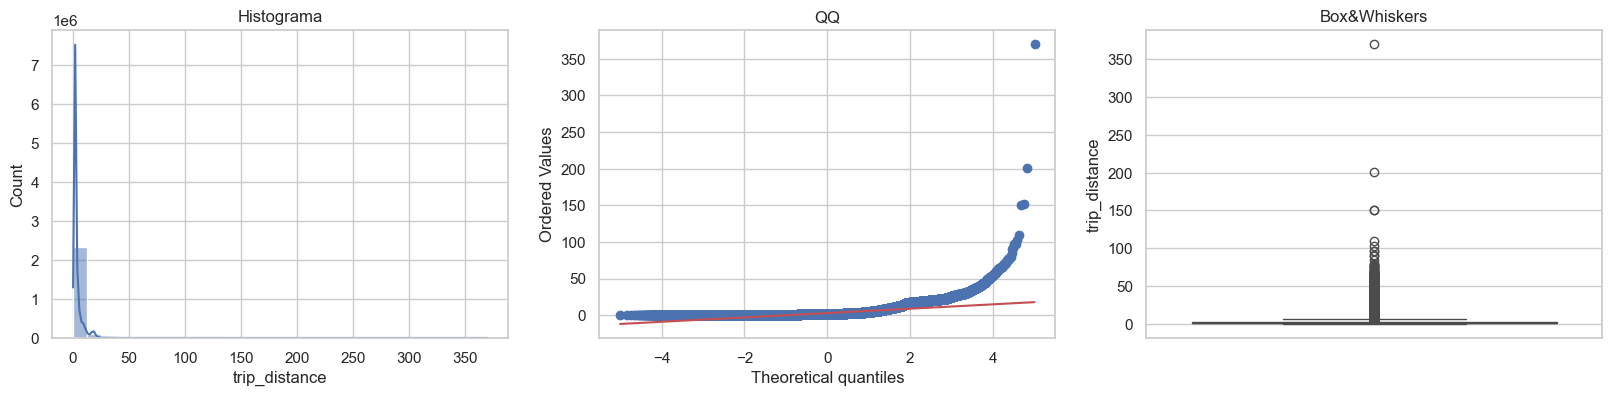

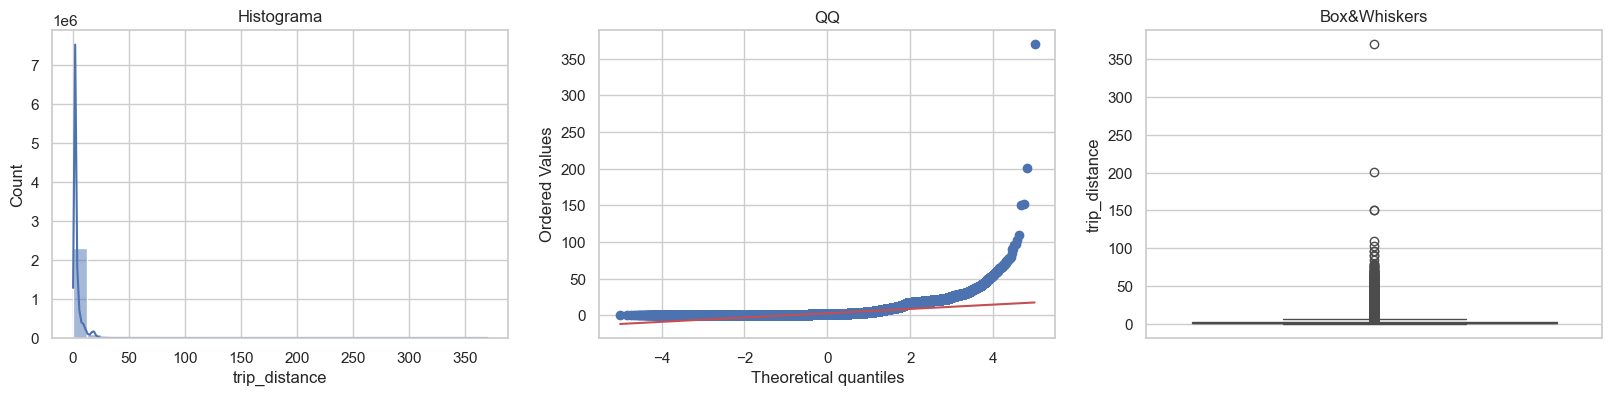

In [209]:
outlier_diagnostic_plots(raw_df, "trip_distance")
outlier_diagnostic_plots(mask_df, "trip_distance")

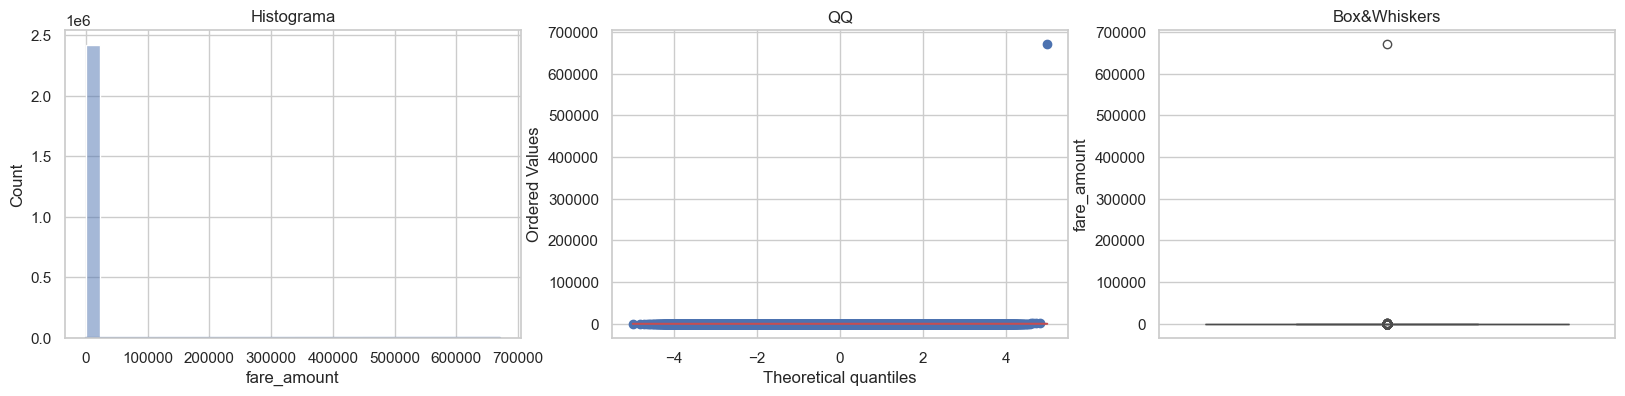

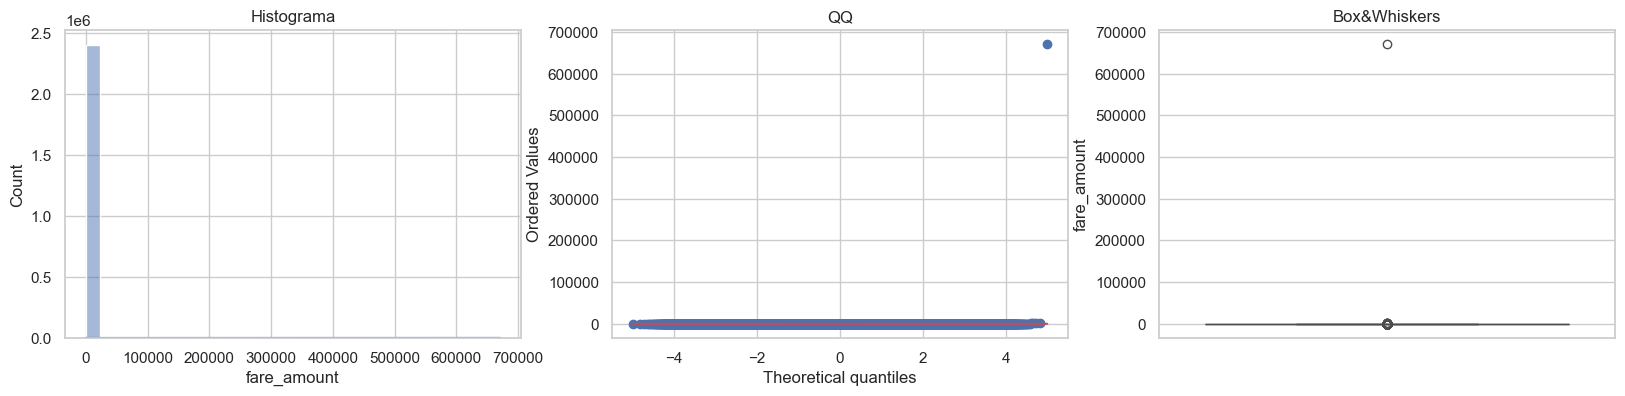

In [210]:
outlier_diagnostic_plots(raw_df, "fare_amount")
outlier_diagnostic_plots(mask_df, "fare_amount")

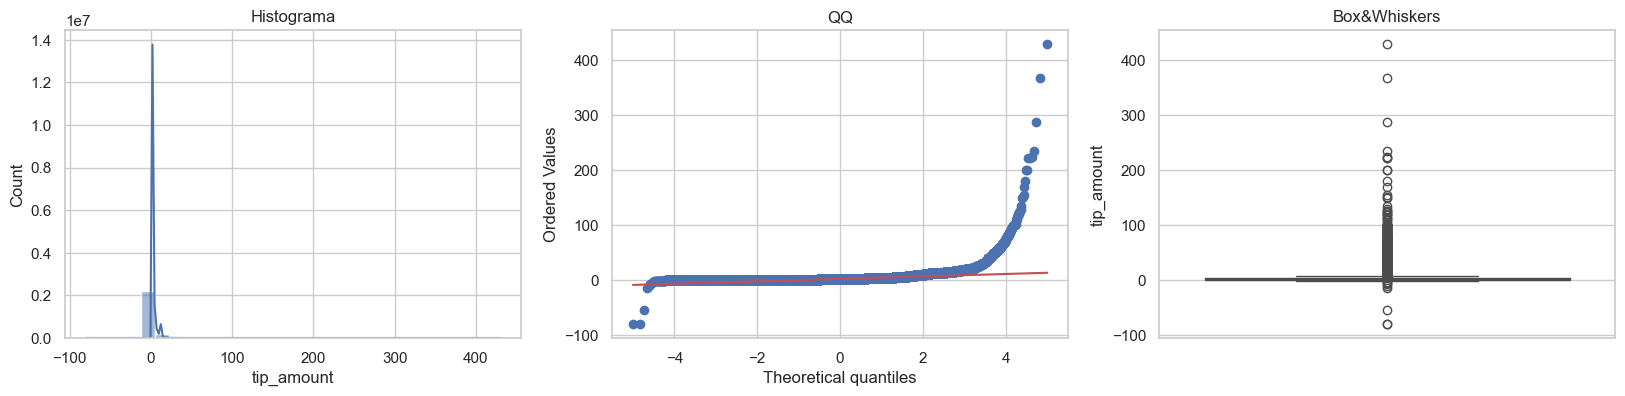

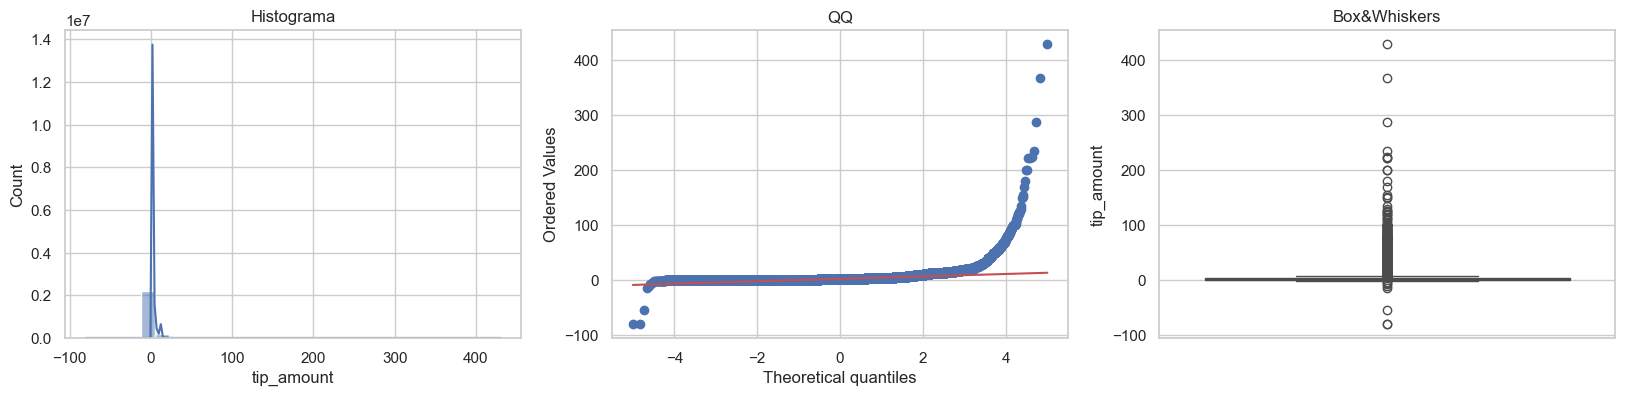

In [211]:

outlier_diagnostic_plots(raw_df, "tip_amount")
outlier_diagnostic_plots(mask_df, "tip_amount")

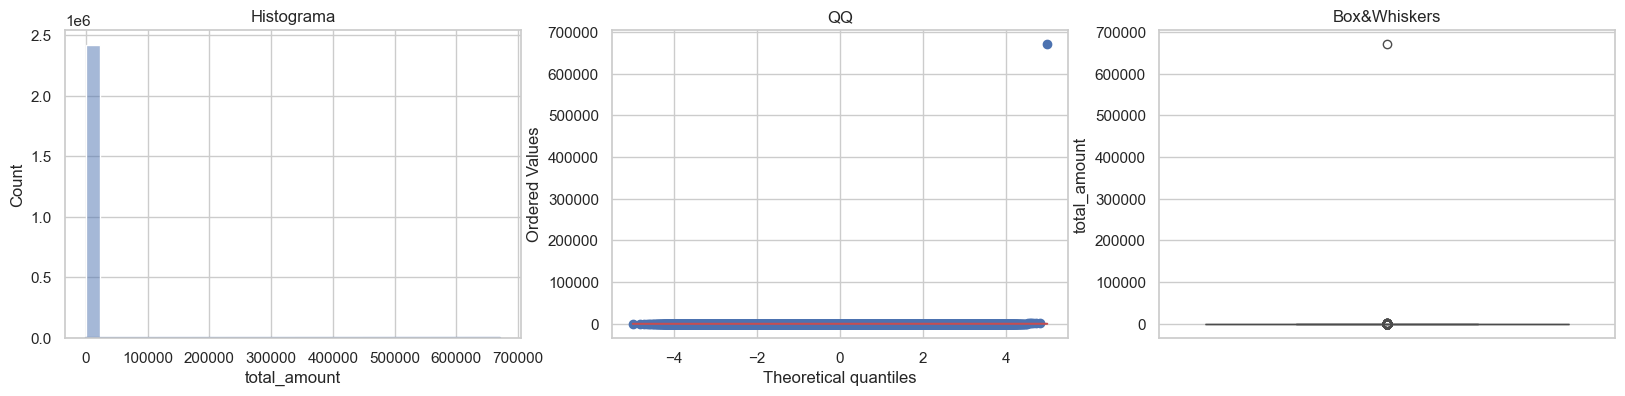

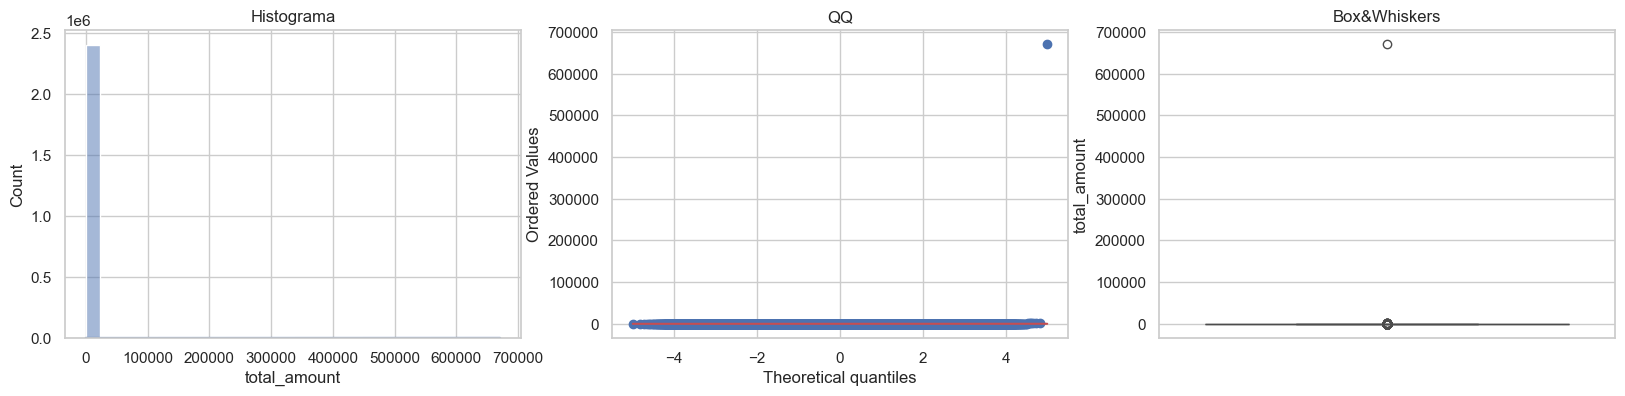

In [212]:
outlier_diagnostic_plots(raw_df, "total_amount")
outlier_diagnostic_plots(mask_df, "total_amount")

Observamos algunas variables numericas continuas de una muestra de 100k elementos del dataframe antes y despues de eliminar las filas con valores nulos. Vemos que las distribuciones no cambian. Esto tambien se apoya sobre el hecho de que la cantidad de observaciones con valores nulos representan menos del 1% del total del dataframe.

Como valores nulos coinciden para las variables: 

- passenger_count
- RatecodeID
- store_and_fwd_flag
- congestion_surcharge

y tambien payment_type es 0 (valor no admitido para la variable categorica). Esto sugiere que tienen una relación (no es un hecho al azar que de que una observacion tenga todos esos valores nulos en simultaneo). Consideramos que tratar de imputar los valores faltantes para todas esas observaciones no seria adecuado al ser observaciones esparzas. Pero como no encontramos información en la web ni en los data dictionary del dataset y la cantidad de observaciones representa menos del 1%, optamos por eliminar dichas observaciones.

In [213]:
#Se dropean filas con valores nulos
raw_df = raw_df[~mask]

In [214]:
## Calculamos el porcentaje de valores cero de passenger_count para el dataset
null_percentage = (((raw_df.passenger_count == 0).sum() * 100) / len(raw_df)).round(2)
null_percentage.astype(str) + '%'

'1.85%'

In [215]:
raw_df[raw_df.passenger_count == 0].describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,year
count,44581.000000,44581,44581,44581.0,44581.000000,44581.000000,44581.000000,44581.000000,44581.000000,44581.000000,44581.000000,44581.000000,44581.000000,44581.000000,44581.000000,44581.000000,44581.000000,44581.000000,44581.000000
mean,1.004307,2019-07-30 03:02:24.979632640,2019-07-30 03:15:44.453623808,0.0,2.733870,1.110810,164.274220,162.613333,1.294991,12.421096,2.570736,0.495693,2.116514,0.312218,0.299751,18.219991,2.236098,2.456517,2019.416971
min,1.000000,2019-02-01 00:08:01,2019-02-01 00:18:15,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,-111.000000,0.000000,-0.500000,-80.000000,0.000000,-0.300000,-111.800000,-2.500000,2.000000,2019.000000
25%,1.000000,2019-02-27 14:02:52,2019-02-27 14:15:09,0.0,0.900000,1.000000,116.000000,113.000000,1.000000,6.000000,2.500000,0.500000,0.000000,0.000000,0.300000,11.000000,2.500000,2.000000,2019.000000
50%,1.000000,2019-03-23 17:50:56,2019-03-23 18:02:49,0.0,1.500000,1.000000,162.000000,162.000000,1.000000,9.000000,2.500000,0.500000,1.850000,0.000000,0.300000,14.150000,2.500000,2.000000,2019.000000
75%,1.000000,2020-02-19 08:44:50,2020-02-19 08:56:09,0.0,2.800000,1.000000,234.000000,234.000000,2.000000,13.500000,3.000000,0.500000,2.850000,0.000000,0.300000,19.550000,2.500000,3.000000,2020.000000
max,2.000000,2020-03-31 23:32:37,2020-03-31 23:48:01,0.0,79.400000,99.000000,265.000000,265.000000,4.000000,350.000000,7.000000,0.500000,65.000000,76.000000,0.300000,350.000000,2.500000,3.000000,2020.000000
std,0.065485,NaN,NaN,0.0,3.675178,2.118509,65.736046,70.170187,0.523850,11.433977,0.910222,0.047166,2.535257,1.628409,0.010911,13.845057,0.768560,0.498111,0.493064


In [216]:
negative_values_mask = ((raw_df.fare_amount <= 0)
    & (raw_df.extra <= 0)
    & (raw_df.mta_tax <= 0)
    & (raw_df.tolls_amount <= 0)
    & (raw_df.improvement_surcharge <= 0)
    & (raw_df.total_amount <= 0)
    & (raw_df.congestion_surcharge <= 0))

In [217]:
raw_df[negative_values_mask].describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,year
count,5732.000000,5732,5732,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000
mean,1.983252,2019-10-01 15:55:53.319085824,2019-10-01 16:05:50.141486336,1.468423,1.572631,1.312980,160.518842,159.785590,3.151431,-10.337620,-0.327983,-0.443475,-0.013782,-0.146825,-0.272732,-13.237088,-1.574930,2.440509,2019.593161
min,1.000000,2019-02-01 00:09:57,2019-02-01 00:09:57,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-400.000000,-4.500000,-0.500000,-80.000000,-21.500000,-0.300000,-400.300000,-2.500000,2.000000,2019.000000
25%,2.000000,2019-03-09 21:43:34.500000,2019-03-09 21:59:15.500000,1.000000,0.030000,1.000000,114.000000,107.000000,3.000000,-9.500000,-0.500000,-0.500000,0.000000,0.000000,-0.300000,-12.800000,-2.500000,2.000000,2019.000000
50%,2.000000,2020-02-08 13:20:01.500000,2020-02-08 13:35:27.500000,1.000000,0.490000,1.000000,161.000000,161.000000,3.000000,-4.500000,0.000000,-0.500000,0.000000,0.000000,-0.300000,-8.300000,-2.500000,2.000000,2020.000000
75%,2.000000,2020-02-27 16:33:50.249999872,2020-02-27 16:40:50,1.000000,1.110000,1.000000,230.000000,231.000000,4.000000,-2.500000,0.000000,-0.500000,0.000000,0.000000,-0.300000,-5.800000,0.000000,3.000000,2020.000000
max,2.000000,2020-03-31 17:42:35,2020-03-31 17:49:45,8.000000,41.620000,99.000000,265.000000,265.000000,4.000000,0.000000,0.000000,0.000000,47.140000,0.000000,0.000000,0.000000,0.000000,3.000000,2020.000000
std,0.128337,NaN,NaN,1.052395,3.360094,3.254475,67.608784,71.419779,0.830680,17.190124,0.569600,0.158340,1.851276,1.104755,0.086245,17.738129,1.207135,0.496492,0.491287


In [218]:
raw_df[negative_values_mask].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,year
2922,2,2019-02-02 18:20:39,2019-02-02 18:20:47,1.0,0.00,1.0,N,193,193,3,-2.5,0.0,-0.5,0.0,0.0,-0.3,-3.3,0.0,2,2019
3359,2,2019-02-27 19:41:11,2019-02-27 19:43:48,2.0,0.26,5.0,N,265,265,3,-74.8,0.0,0.0,0.0,0.0,-0.3,-75.1,0.0,2,2019
5041,2,2019-02-08 10:46:07,2019-02-08 11:01:32,1.0,0.95,1.0,N,234,90,3,-10.0,0.0,-0.5,0.0,0.0,-0.3,-13.3,-2.5,2,2019
6582,2,2019-02-02 14:19:52,2019-02-02 14:33:32,2.0,3.51,1.0,N,239,246,4,-14.0,0.0,-0.5,0.0,0.0,-0.3,-17.3,0.0,2,2019
7781,2,2019-02-02 19:55:04,2019-02-02 20:02:15,2.0,1.04,1.0,N,129,129,4,-6.0,0.0,-0.5,0.0,0.0,-0.3,-6.8,0.0,2,2019


Eliminamos dichas filas:

In [219]:
raw_df = raw_df[~negative_values_mask]

Transformamos los valores pickup y dropoff en datetime:

In [220]:
raw_df['tpep_pickup_datetime'] = pd.to_datetime(raw_df['tpep_pickup_datetime'])
raw_df['tpep_dropoff_datetime'] = pd.to_datetime(raw_df['tpep_dropoff_datetime'])

In [221]:
#Agregamos un nuevo feature llamado "trip duration" en minutos
raw_df['trip_duration'] = (raw_df['tpep_dropoff_datetime'] - raw_df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [222]:
raw_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,year,trip_duration
count,2.401630e+06,2401630,2401630,2.401630e+06,2.401630e+06,2.401630e+06,2.401630e+06,2.401630e+06,2.401630e+06,2.401630e+06,2.401630e+06,2.401630e+06,2.401630e+06,2.401630e+06,2.401630e+06,2.401630e+06,2.401630e+06,2.401630e+06,2.401630e+06,2.401630e+06
mean,1.648667e+00,2019-07-17 03:53:39.427555328,2019-07-17 04:10:13.518165760,1.542751e+00,2.893037e+00,1.060319e+00,1.634101e+02,1.614678e+02,1.264982e+00,1.301853e+01,1.151167e+00,4.971761e-01,2.205021e+00,3.386139e-01,2.999198e-01,1.896294e+01,2.264121e+00,2.448724e+00,2.019383e+03,1.656818e+01
min,1.000000e+00,2008-12-31 23:03:42,2008-12-31 23:10:26,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.500000e+00,-2.500000e+00,-5.000000e-01,0.000000e+00,-6.120000e+00,-3.000000e-01,-4.300000e+00,0.000000e+00,2.000000e+00,2.019000e+03,-5.254605e+05
25%,1.000000e+00,2019-02-25 08:52:25.249999872,2019-02-25 09:09:43.249999872,1.000000e+00,9.600000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00,2.000000e+00,2.019000e+03,6.500000e+00
50%,2.000000e+00,2019-03-20 15:24:41.500000,2019-03-20 15:45:04,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00,2.000000e+00,2.019000e+03,1.081667e+01
75%,2.000000e+00,2020-02-15 15:07:53.750000128,2020-02-15 15:23:12.750000128,2.000000e+00,2.960000e+00,1.000000e+00,2.330000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.950000e+00,0.000000e+00,3.000000e-01,2.015000e+01,2.500000e+00,3.000000e+00,2.020000e+03,1.753333e+01
max,4.000000e+00,2020-07-11 12:51:24,2020-07-11 12:54:27,9.000000e+00,3.699400e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.711001e+05,1.850000e+01,5.000000e-01,4.300000e+02,7.666600e+02,1.000000e+00,6.711032e+05,2.750000e+00,3.000000e+00,2.020000e+03,2.598798e+04
std,5.011463e-01,NaN,NaN,1.195734e+00,3.765261e+00,6.851728e-01,6.582307e+01,7.009321e+01,4.596987e-01,4.331920e+02,1.265002e+00,3.747255e-02,2.694253e+00,1.708263e+00,4.940260e-03,4.332677e+02,7.307759e-01,4.973639e-01,4.859979e-01,3.459776e+02


Consultamos el dataframe para ver si tenemos observaciones con pickup time menor a febrero de 2019 o mayor a marzo 2020. Luego las eliminamos del dataframe.

In [223]:
datetime_mask = ((~raw_df['tpep_pickup_datetime'].dt.year.isin([2019, 2020])) 
    | (~raw_df['tpep_pickup_datetime'].dt.month.isin([2, 3])))

raw_df[datetime_mask].describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,year,trip_duration
count,110.0,110,110,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,1.100000e+02,110.000000,110.000000,110.000000,110.00000,110.000000
mean,2.0,2017-12-14 01:12:41.881818368,2017-12-14 02:29:22.181817856,1.909091,3.368091,1.063636,167.972727,161.781818,1.363636,13.711818,0.486364,0.495455,1.952091,0.216000,3.000000e-01,18.752636,1.590909,2.254545,2019.40000,76.671667
min,2.0,2008-12-31 23:03:42,2008-12-31 23:10:26,1.000000,0.000000,1.000000,7.000000,13.000000,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000,3.000000e-01,3.300000,0.000000,2.000000,2019.00000,0.066667
25%,2.0,2019-01-31 23:40:22.750000128,2019-01-31 23:59:04.750000128,1.000000,1.022500,1.000000,133.250000,107.000000,1.000000,6.000000,0.500000,0.500000,0.000000,0.000000,3.000000e-01,10.350000,0.000000,2.000000,2019.00000,5.762500
50%,2.0,2019-04-01 12:18:36,2019-04-01 12:30:36.500000,1.000000,1.790000,1.000000,162.000000,161.000000,1.000000,9.500000,0.500000,0.500000,1.710000,0.000000,3.000000e-01,13.800000,2.500000,2.000000,2019.00000,11.341667
75%,2.0,2020-01-31 15:55:25.750000128,2020-01-31 16:10:34.500000,2.000000,4.045000,1.000000,232.750000,232.750000,2.000000,15.250000,0.500000,0.500000,2.690000,0.000000,3.000000e-01,20.790000,2.500000,2.750000,2020.00000,19.595833
max,2.0,2020-07-11 12:51:24,2020-07-11 12:54:27,6.000000,19.080000,5.000000,263.000000,263.000000,2.000000,52.500000,4.500000,0.500000,16.480000,6.120000,3.000000e-01,82.400000,2.500000,3.000000,2020.00000,1398.600000
std,0.0,NaN,NaN,1.662017,3.842702,0.412584,66.168600,65.252422,0.483247,11.667903,0.461644,0.047673,2.532098,1.117549,1.115304e-16,13.719706,1.208118,0.437599,0.49214,253.213346


Vemos que tenemos 110 filas donde ya sea el año o el mes no corresponden con el deseado, al ser pocos valores directamente optamos por asumir que son errores y filtrarlos.

In [224]:
raw_df = raw_df[~datetime_mask]

Buscamos si hay valores para "trip_duration" que sean cero o negativas

In [225]:
null_duration_mask = ((raw_df['trip_duration']== 0))

In [226]:
neg_duration_mask = ((raw_df['trip_duration']< 0))

In [227]:
raw_df[null_duration_mask].describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,year,trip_duration
count,1665.000000,1665,1665,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.0
mean,1.148348,2019-06-20 19:19:58.174173952,2019-06-20 19:19:58.174173952,1.272673,0.160991,2.519520,178.015015,259.551952,1.944745,15.270042,1.935736,0.446547,0.365405,0.459417,0.272432,18.757087,1.549550,2.414414,2019.313514,0.0
min,1.000000,2019-02-01 04:58:01,2019-02-01 04:58:01,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2019.000000,0.0
25%,1.000000,2019-02-18 11:21:38,2019-02-18 11:21:38,1.000000,0.000000,1.000000,132.000000,264.000000,2.000000,2.500000,0.000000,0.500000,0.000000,0.000000,0.300000,5.800000,0.000000,2.000000,2019.000000,0.0
50%,1.000000,2019-03-11 18:11:54,2019-03-11 18:11:54,1.000000,0.000000,1.000000,169.000000,264.000000,2.000000,6.000000,2.500000,0.500000,0.000000,0.000000,0.300000,9.800000,2.500000,2.000000,2019.000000,0.0
75%,1.000000,2020-02-10 13:08:38,2020-02-10 13:08:38,1.000000,0.000000,1.000000,239.000000,264.000000,2.000000,15.500000,3.000000,0.500000,0.000000,0.000000,0.300000,18.800000,2.500000,3.000000,2020.000000,0.0
max,4.000000,2020-03-27 06:52:10,2020-03-27 06:52:10,6.000000,24.200000,99.000000,265.000000,265.000000,3.000000,350.000000,7.000000,0.500000,39.300000,90.500000,0.300000,350.000000,2.500000,3.000000,2020.000000,0.0
std,0.360587,NaN,NaN,0.881230,1.390788,10.690961,71.360191,25.993686,0.260497,23.202393,1.409451,0.154544,2.198171,3.077008,0.086688,24.298731,1.213942,0.492769,0.464060,0.0


In [228]:
raw_df[neg_duration_mask].describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,year,trip_duration
count,2.0,2,2,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.0,2.0,2.0,2.000000,2.000000,2.0,2.000000,2.0,2.0,2.000000,2.000000
mean,1.0,2019-08-13 17:32:47.500000,2019-02-08 19:27:13,1.0,21.650000,2.0,132.0,124.500000,1.500000,52.0,2.5,0.5,6.125000,5.940000,0.3,67.365000,2.5,2.0,2019.500000,-267725.575000
min,1.0,2019-02-13 15:15:00,2018-02-13 17:34:31,1.0,21.300000,2.0,132.0,88.000000,1.000000,52.0,2.5,0.5,0.000000,5.760000,0.3,61.060000,2.5,2.0,2019.000000,-525460.483333
25%,1.0,2019-05-15 04:23:53.750000128,2018-08-12 18:30:52,1.0,21.475000,2.0,132.0,106.250000,1.250000,52.0,2.5,0.5,3.062500,5.850000,0.3,64.212500,2.5,2.0,2019.250000,-396593.029167
50%,1.0,2019-08-13 17:32:47.500000,2019-02-08 19:27:13,1.0,21.650000,2.0,132.0,124.500000,1.500000,52.0,2.5,0.5,6.125000,5.940000,0.3,67.365000,2.5,2.0,2019.500000,-267725.575000
75%,1.0,2019-11-12 06:41:41.249999872,2019-08-07 20:23:34,1.0,21.825000,2.0,132.0,142.750000,1.750000,52.0,2.5,0.5,9.187500,6.030000,0.3,70.517500,2.5,2.0,2019.750000,-138858.120833
max,1.0,2020-02-10 19:50:35,2020-02-03 21:19:55,1.0,22.000000,2.0,132.0,161.000000,2.000000,52.0,2.5,0.5,12.250000,6.120000,0.3,73.670000,2.5,2.0,2020.000000,-9990.666667
std,0.0,NaN,NaN,0.0,0.494975,0.0,0.0,51.618795,0.707107,0.0,0.0,0.0,8.662058,0.254558,0.0,8.916617,0.0,0.0,0.707107,364492.202862


Dado que tenemos un pequeño valor de viajes donde la duracion es negativa o cero, dropeamos estas filas. 

In [229]:
raw_df = raw_df[(~neg_duration_mask) & (~null_duration_mask)]

Vemos la cantidad de valores cero para la variable passenger_count:

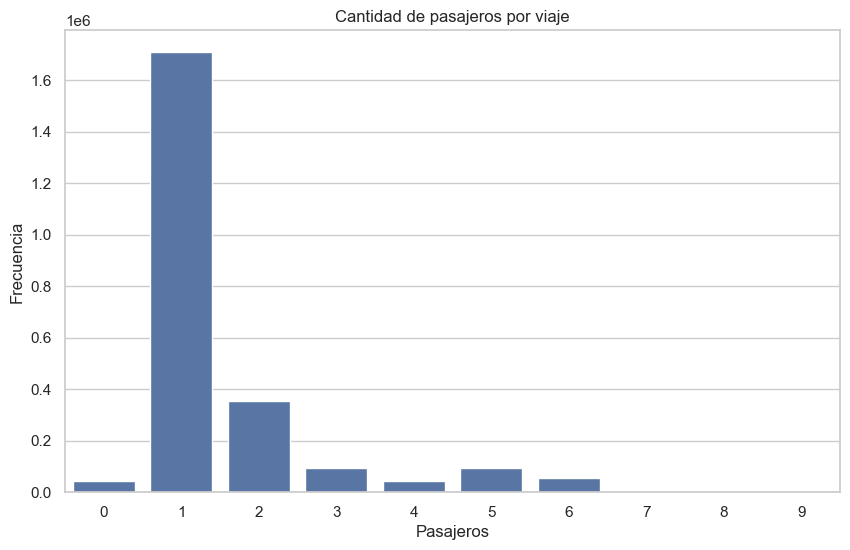

In [230]:
conteo_valores = raw_df.passenger_count.value_counts()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_valores.index.astype(int), y=conteo_valores.values)

plt.title('Cantidad de pasajeros por viaje')
plt.xlabel('Pasajeros')
plt.ylabel('Frecuencia')

plt.show()

In [231]:
cero_passenger_mask = (raw_df.passenger_count == 0)
cero_percentage = ((cero_passenger_mask.sum() * 100) / len(raw_df)).__round__(2)
cero_percentage.astype(str) + '%'

'1.85%'

In [232]:
raw_df[cero_passenger_mask].describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,month,year,trip_duration
count,44484.000000,44484,44484,44484.0,44484.000000,44484.000000,44484.000000,44484.000000,44484.000000,44484.000000,44484.000000,44484.000000,44484.000000,44484.000000,4.448400e+04,44484.000000,44484.000000,44484.000000,44484.000000,44484.000000
mean,1.004069,2019-07-30 05:17:20.420892928,2019-07-30 05:30:41.479475712,0.0,2.739765,1.067755,164.226958,162.425591,1.293521,12.416927,2.572846,0.496100,2.122162,0.312267,3.000000e-01,18.224404,2.238277,2.456726,2019.417206,13.350976
min,1.000000,2019-02-01 00:08:01,2019-02-01 00:18:15,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e-01,0.300000,0.000000,2.000000,2019.000000,0.016667
25%,1.000000,2019-02-27 14:30:38.500000,2019-02-27 14:49:05.500000,0.0,0.900000,1.000000,116.000000,113.000000,1.000000,6.000000,2.500000,0.500000,0.000000,0.000000,3.000000e-01,11.000000,2.500000,2.000000,2019.000000,6.212500
50%,1.000000,2019-03-23 18:09:55.500000,2019-03-23 18:22:40.500000,0.0,1.500000,1.000000,162.000000,162.000000,1.000000,9.000000,2.500000,0.500000,1.850000,0.000000,3.000000e-01,14.150000,2.500000,2.000000,2019.000000,10.466667
75%,1.000000,2020-02-19 09:05:10.750000128,2020-02-19 09:17:17,0.0,2.800000,1.000000,233.000000,234.000000,2.000000,13.500000,3.000000,0.500000,2.850000,0.000000,3.000000e-01,19.550000,2.500000,3.000000,2020.000000,16.983333
max,2.000000,2020-03-31 23:32:37,2020-03-31 23:48:01,0.0,79.400000,99.000000,265.000000,265.000000,4.000000,285.000000,7.000000,0.500000,65.000000,76.000000,3.000000e-01,285.300000,2.500000,3.000000,2020.000000,1439.316667
std,0.063659,NaN,NaN,0.0,3.677003,0.630793,65.724405,70.101260,0.522594,11.271356,0.907592,0.043988,2.505386,1.626634,5.551178e-17,13.701319,0.765390,0.498129,0.493103,15.830998


Como la cantidad de observaciones con valores cero para la columna passenger_count representa menos del 5% total de observaciones, eliminamos las mismas del dataframe.

In [233]:
raw_df = raw_df[~cero_passenger_mask]

In [234]:
raw_df.shape

(2355369, 21)

In [235]:
org_df =  pd.read_parquet(DATASET_PATH)

In [236]:
org_df.shape

(2422305, 21)

In [237]:
#Porcentaje filtrado

print(f"Porcentaje de valores eliminados {((org_df.shape[0] - raw_df.shape[0])/org_df.shape[0])*100}")

Porcentaje de valores eliminados 2.7633184095314176


In [238]:
null_filtered_df = raw_df

Finalmente, vemos que del dataset original hemos filtrado el 2.76% de los valores del dataset, debido a nulidad de sus valores

### Filtrado de columnas. 

Las siguientes columnas no nos brindan mucha informacion respecto a las preguntas que deseamos responder, por ello directamente haremos un drop de dichas columnas, las cuales son: 

* VendorID
* RatecodeID, 
* store_and_fwd_flag
* congestion_surcharge 
* airport_fee (already dropped)



In [239]:
columns_to_drop = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge']
column_filtered_df = null_filtered_df.drop(columns=columns_to_drop)

También, nos quedaremos solo con los datos que hayan sido pagados con Credit Card (Payment_type = 1) porque dichos datos se cargan automaticamente al finalizar un viaje mientras que los otros métodos se cargan manualmente. Esto nos asegura tener datos más certeros. 

In [240]:
pyment_type_filtered_df =column_filtered_df[column_filtered_df['payment_type']==1]

pyment_type_filtered_df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,year,trip_duration
1,2019-02-06 10:01:07,2019-02-06 10:05:03,1.0,0.54,263,236,1,4.5,0.0,0.5,1.56,0.0,0.3,9.36,2,2019,3.933333
2,2019-02-11 12:37:17,2019-02-11 12:47:41,2.0,1.41,236,75,1,8.5,0.0,0.5,2.36,0.0,0.3,14.16,2,2019,10.400000
3,2019-02-19 22:37:11,2019-02-19 22:47:26,1.0,2.10,164,141,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2,2019,10.250000
4,2019-02-21 15:31:37,2019-02-21 15:54:16,1.0,3.26,249,87,1,16.5,1.0,0.5,4.16,0.0,0.3,24.96,2,2019,22.650000
6,2019-02-01 00:58:37,2019-02-01 00:59:32,1.0,0.27,170,170,1,3.0,0.5,0.5,1.29,0.0,0.3,5.59,2,2019,0.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422299,2020-03-09 07:03:02,2020-03-09 07:13:28,1.0,2.44,43,43,1,10.0,0.0,0.5,2.66,0.0,0.3,15.96,3,2020,10.433333
2422300,2020-03-24 12:49:30,2020-03-24 12:54:39,1.0,1.70,90,48,1,7.0,0.0,0.5,2.06,0.0,0.3,12.36,3,2020,5.150000
2422301,2020-03-16 06:13:47,2020-03-16 06:19:36,1.0,1.31,162,137,1,6.5,0.0,0.5,1.96,0.0,0.3,11.76,3,2020,5.816667
2422302,2020-03-04 13:06:20,2020-03-04 13:15:57,6.0,1.35,234,114,1,8.0,0.0,0.5,2.26,0.0,0.3,13.56,3,2020,9.616667


Como resumen, llegamos a un dataset con: 

* Datos correspondientes a los meses de Febrero y Marzo de los años 2019 y 2020 (Sampleo del 10% de cada mes)
* Se agregó una columna de trip_duration 
* Se filtraron los valores nulos/erroneos encontrados (3.35%)
* Se eliminaron las columnas: ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge', 'airport_fee'] por no aportar informacion relevante al analisis planteado
* Nos quedamos solo con los datos correspondientes a pagos con tarjeta de credito por tratarse de datos mas fiables. 

Finalmente llegamos a un dataset filtrado de aproximadamente 1.35 Millones de filas. 

In [241]:
pyment_type_filtered_df.to_parquet('../data/null_filtered_sampled_data.parquet')